## Avaliação - Classificação Automática de Segmentos de Imagens 

Nesta prática você irá avaliar um dataset de 1.500 segmentos de imagens. Nesse projeto, cada instancia representa um segmento de 3x3 pixels de uma imagem de algum dos seguintes elementos:

<img src="segments.png" alt="Imagens que foram seguementadas">

Assim, esta tarefa consiste em classificar tais segmentos de 3x3 pixels em um dos tipos de imagens externas (cimento, janela, grama, etc.). Cada instancia é representada da seguinte forma: 

<ol>
    <li>region-centroid-col:  média do valor dos pixels (coluna) </li>
    <li>region-centroid-row:  média do valor dos pixels (linha) </li>
    <li>region-pixel-count:  o número de pixels em uma região(3x3 = 9 neste caso) </li>
    <li>short-line-density-5: resultados de uma linha extraída no algoritmo que conta quantas linhas de comprimento 5 (qualquer orientação) com baixo contraste, menor ou igual a 5, passam pela região. </li>
    <li>short-line-density-2:  igual a densidade de linha curta-5, mas conta linhas de alto contraste, maiores que 2 </li>
    <li>vedge-mean: mede o contraste de pixels adjacentes horizontalmente na região. Existem 6, a média e o desvio padrão são dados. Este atributo é usado como um detector de borda vertical.</li>
    <li>vegde-sd: desvio padrão do contraste de pixels adjacentes horizontalmente </li>
    <li>hedge-mean: mede o contraste de pixels adjacentes verticalmente. Usado para detecção de linha horizontal. </li>
    <li>hedge-sd: desvio padrão do contraste de pixels adjacentes verticalmente.</li>
    <li>intensity-mean:  a média na região de (R + G + B) / 3 </li>
    <li>rawred-mean: a média sobre a região do valor R (cor vermelha) </li>
    <li>rawblue-mean: a média sobre a região do valor B (cor azul) </li>
    <li>rawgreen-mean: a média sobre a região do valor G (cor verde) </li>
    <li>exred-mean: mede o excesso de vermelho: (2R - (G + B)) </li>
    <li>exblue-mean: mede o excesso de azul: (2B - (G + R)) </li>
    <li>exgreen-mean: mede o excesso de verde:  (2G - (R + B)) </li>
    <li>value-mean: transformação não-linear 3-d de RGB </li>
    <li>saturatoin-mean: média de saturação do RGB</li>
    <li>hue-mean: média de tonalidade do RGB </li>
    <b><li style="color: red">y-i: classe a ser inferida (ver figura acima)</li></b>
</ol>

<a href="https://storm.cis.fordham.edu/~gweiss/data-mining/weka-data/segment-challenge.arff">**Referência**</a>

**Atividade 7 - Leitura do Dataset e criação dos folds:** Leia o dataset [`segment.csv`](segment.csv). Faça a validação cruzada de 5 partições.

In [1]:
import pandas as pd
from resultado import Fold

# define classes
texturas_names = ['brickface','sky','foliage','cement','window','path','grass']
texturas_numbers = [x for x in range(0,7,1)]
texturas = dict(zip(texturas_numbers,texturas_names))

# recover DataFrame
df_segment = pd.DataFrame(pd.read_csv('segment.csv'))

#gera o fold e p experimento
folds = Fold.gerar_k_folds(df_segment,val_k=5,col_classe='y-i',
                            num_repeticoes=1,seed=1,
                            num_folds_validacao=3,num_repeticoes_validacao=2)

Exibir dados

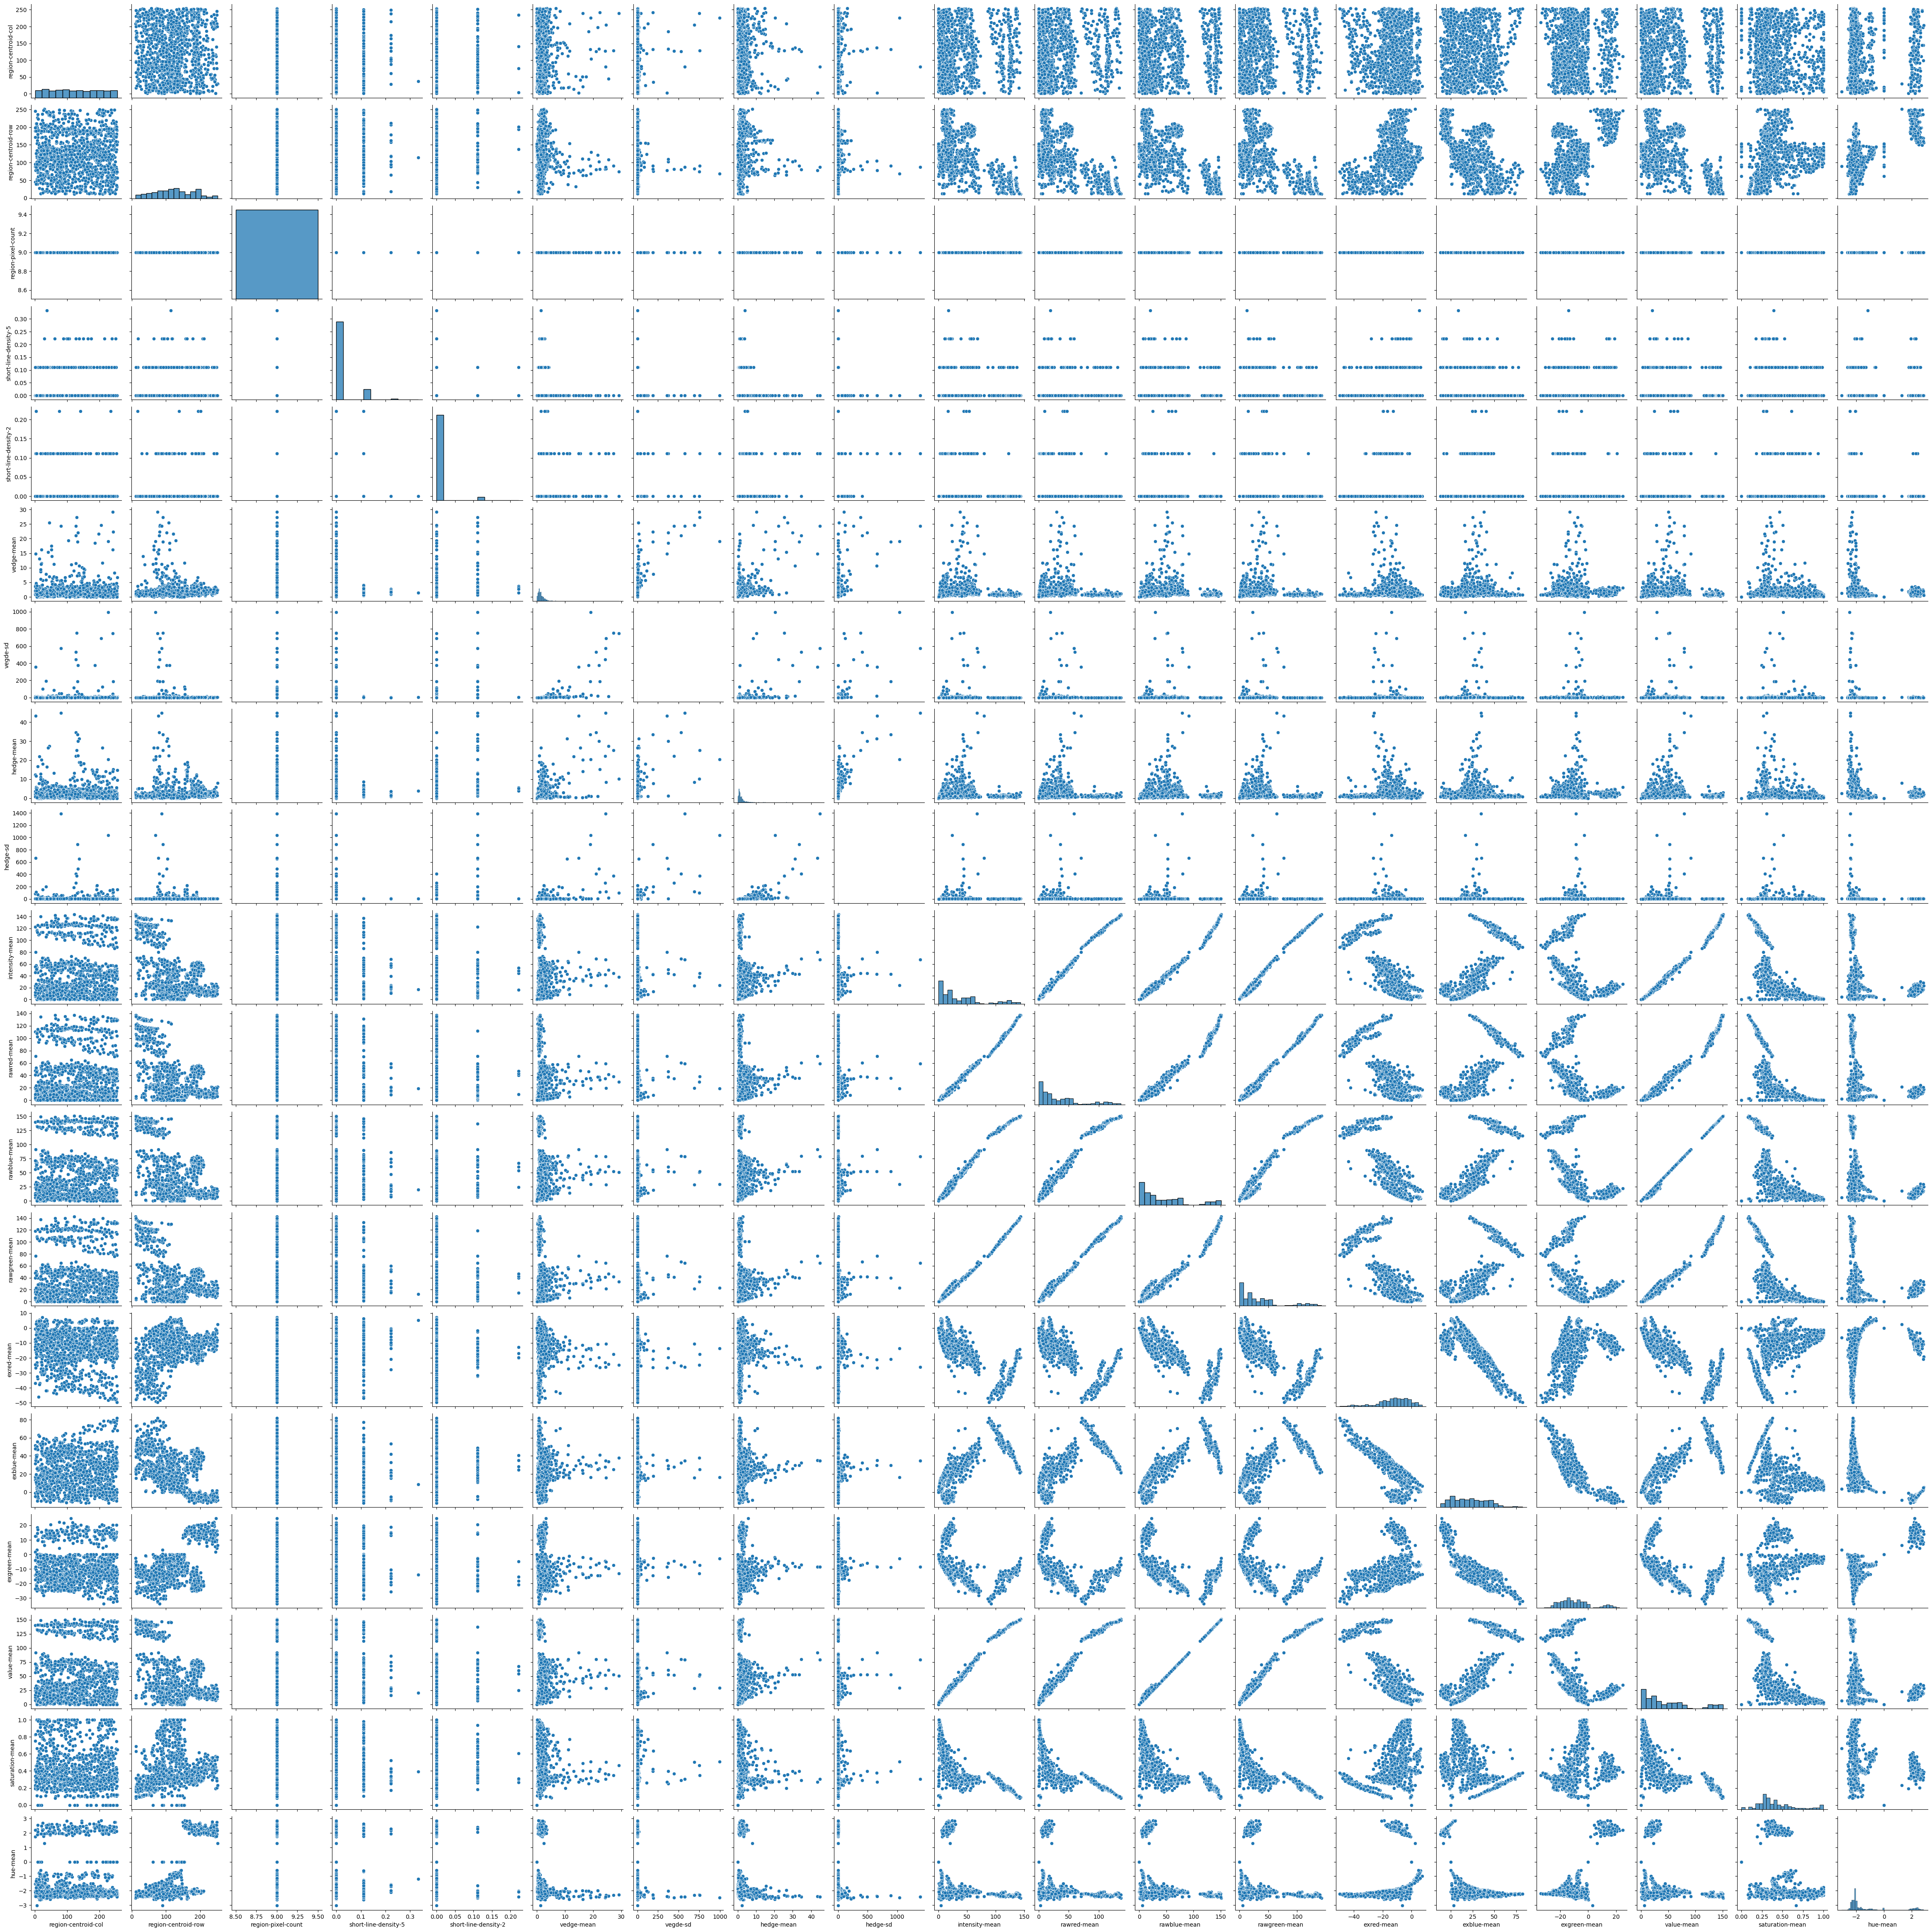

In [2]:
import seaborn as sns
sns.pairplot(df_segment.drop('y-i', axis=1))

**Atividade 8 - Variação de parametros e exibição e analise de resultados: ** Aplique, pelo menos, os métodos RandomForest e Árvore de Decisão no problema variando os parametros (no mínimo, da mesma forma que foi variado na Parte 2). Apresente os resultados faça uma analise e responda, pelo menos: quais são as classes mais dificieis/fácieis de prever? Quais se confundem mais? Qual é o melhor método de classificação? Quais são os melhores parametros para cada método de aprendizado de máquina?

Para fazer a análise por classe, use as predições de todos os folds (apenas uma repetição) e gere a matriz de confusão. Qualquer dúvida, veja a aula sobre avaliação de métodos de aprendizado de máquina. A classe Resultado implementa essa matriz. 

Método RandomForest

In [3]:
import hiplot as hip 
from sklearn.ensemble import RandomForestClassifier
import optuna

from avaliacao import Experimento, OtimizacaoObjetivoRandomForest, Experimento
from metodo import ScikitLearnAprendizadoDeMaquina

clf_rf = RandomForestClassifier(random_state=1)
ml_method = ScikitLearnAprendizadoDeMaquina(clf_rf)
exp = Experimento(folds,ml_method, OtimizacaoObjetivoRandomForest, num_trials=10,
                    sampler=optuna.samplers.TPESampler(seed=1, n_startup_trials=3))
exp.calcula_resultados()

[I 2023-09-13 10:41:54,017] A new study created in memory with name: no-name-8968a7b8-da5a-4d85-b380-d403919b88e1
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:124: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:125: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  max_features = trial.suggest_uniform('max_features', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elem

[I 2023-09-13 10:41:54,645] Trial 4 finished with value: 0.8848410453961589 and parameters: {'min_samples_split': 0.01970817164115961, 'max_features': 0.008134902870339411, 'num_arvores': 5}. Best is trial 3 with value: 0.9482806712142349.
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:124: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:125: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  max_features = trial.suggest_uniform('max_features', 0, 0.5)
C:\Users\user\Documents\

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 0 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 3 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 4 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi de

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:124: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:125: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  max_features = trial.suggest_uniform('max_features', 0, 0.5)
[I 2023-09-13 10:41:55,729] Trial 1 finished with value: 0.7954773940958169 and parameters: {'min_samples_split': 0.10222612486575872, 'max_features': 0.4390587181954727, 'num_arvores': 1}. Best is trial 1 with value: 0.7954773940958169.
C:\Users\user\Documents\Gi

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:124: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:125: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  max_features = trial.suggest_uniform('max_features', 0, 0.5)
[I 2023-09-13 10:41:56,329] Trial 6 finished with value: 0.9484708008378645 and parameters: {'min_samples_split': 0.005516917673828947, 'max_features': 0.4009448226015814, 'num_arvores': 5}. Best is trial 6 with value: 0.9484708008378645.
C:\Users\user\Documents\G

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 2 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 3 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 4 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi de

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:124: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:125: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  max_features = trial.suggest_uniform('max_features', 0, 0.5)
[I 2023-09-13 10:41:57,305] Trial 3 finished with value: 0.8886223007118188 and parameters: {'min_samples_split': 0.021385632703359858, 'max_features': 0.04430884541496681, 'num_arvores': 5}. Best is trial 3 with value: 0.8886223007118188.
C:\Users\user\Documents\

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 2 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 3 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 4 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi de

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:124: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:125: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  max_features = trial.suggest_uniform('max_features', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 0 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para 

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:124: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:125: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  max_features = trial.suggest_uniform('max_features', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 2 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para 

[I 2023-09-13 10:41:59,401] A new study created in memory with name: no-name-cf254dcb-098e-4e99-8d86-263f393d35c9
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:124: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:125: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  max_features = trial.suggest_uniform('max_features', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elem

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:124: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:125: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  max_features = trial.suggest_uniform('max_features', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 0 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para 

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:124: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:125: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  max_features = trial.suggest_uniform('max_features', 0, 0.5)
[I 2023-09-13 10:41:59,975] Trial 5 finished with value: 0.8947004848288788 and parameters: {'min_samples_split': 0.008201986272521698, 'max_features': 0.00787668588899976, 'num_arvores': 3}. Best is trial 5 with value: 0.8947004848288788.
C:\Users\user\Documents\

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:124: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:125: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  max_features = trial.suggest_uniform('max_features', 0, 0.5)
[I 2023-09-13 10:42:00,565] Trial 8 finished with value: 0.8265001880779996 and parameters: {'min_samples_split': 0.11833169714535635, 'max_features': 0.014498256355785576, 'num_arvores': 3}. Best is trial 5 with value: 0.8947004848288788.
C:\Users\user\Documents\

Forma Tabular:

In [4]:
studdy_fold_0 = exp.studies_per_fold[0]
studdy_fold_0.trials_dataframe().sort_values("value",ascending=False)

number     value             datetime_start          datetime_complete  \
3       3  0.948281 2023-09-13 10:41:54.273022 2023-09-13 10:41:54.481013   
6       6  0.939916 2023-09-13 10:41:54.826019 2023-09-13 10:41:54.996012   
4       4  0.884841 2023-09-13 10:41:54.483014 2023-09-13 10:41:54.645020   
2       2  0.870009 2023-09-13 10:41:54.168017 2023-09-13 10:41:54.272022   
1       1  0.776977 2023-09-13 10:41:54.099015 2023-09-13 10:41:54.166018   
5       5  0.750553 2023-09-13 10:41:54.646039 2023-09-13 10:41:54.825020   
9       9  0.749201 2023-09-13 10:41:55.366020 2023-09-13 10:41:55.515018   
0       0  0.680858 2023-09-13 10:41:54.021019 2023-09-13 10:41:54.097017   
7       7  0.665553 2023-09-13 10:41:54.997013 2023-09-13 10:41:55.129017   
8       8  0.494991 2023-09-13 10:41:55.131017 2023-09-13 10:41:55.362019   

                duration  params_max_features  params_min_samples_split  \
3 0 days 00:00:00.207991             0.163638                  0.006228   
6 0 days 00:00:00.169993             0.219455                  0.014733   
4 0 days 00:00:00.162006             0.008135                  0.019708   
2 0 days 00:00:00.104005             0.172780                  0.093130   
1 0 days 00:00:00.067003             0.073378                  0.151166   
5 0 days 00:00:00.178981             0.496695                  0.388678   
9 0 days 00:00:00.148998             0.163679                  0.235499   
0 0 days 00:00:00.075998             0.360162                  0.208511   
7 0 days 00:00:00.132004             0.111096                  0.315703   
8 0 days 00:00:00.231002             0.302326                  0.481135   

   params_num_arvores     state  
3                   5  COMPLETE  
6                   4  COMPLETE  
4                   5  COMPLETE  
2                   2  COMPLETE  
1                   1  COMPLETE  
5                   5  COMPLETE  
9                   3  COMPLETE  
0                   1  COMPLETE  
7                   3  COMPLETE  
8                   4  COMPLETE

Gráfico:

In [5]:
#gera grafico da variacao de parametros (apenas fold 0)
trials_fold_0 = exp.studies_per_fold[0].trials
data = [{**trial.params, 'loss': trial.value} for trial in trials_fold_0]
hip.Experiment.from_iterable(data).display(force_full_width=True)

<IPython.core.display.Javascript object>

Resultados Random Forest:

In [6]:
for resultado in exp.resultados:
    print("Macro f1: " + str(resultado.macro_f1))
    print("\nAcuracia: " + str(resultado.acuracia))
    print("\nf1 por classe: ")
    for key in resultado.f1_por_classe.keys():
        print('\t{} -> {}'.format(texturas[key], resultado.f1_por_classe[key]))
    print("\nprecisao: ")
    for key in resultado.precisao.keys():
        print('\t{} -> {}'.format(texturas[key], resultado.precisao[key]))
    print("\nrevocacao: ")
    for key in resultado.revocacao.keys():
        print('\t{} -> {}'.format(texturas[key], resultado.revocacao[key]))
    print('\nMatriz de confusao: ')
    print("\t", end='')
    for names in texturas.values():
        print(names[:2]+"\t", end='')
    print()
    for i in resultado.mat_confusao:
        print(texturas[i][0:2]+"\t", end='')
        for j in resultado.mat_confusao[i]:
            print(str(resultado.mat_confusao[i][j])+"\t", end='')
        print()
    print('\n')
    print('===================================================================\n')

Macro f1: 0.974471364948822

Acuracia: 0.9766666666666667

f1 por classe: 
	brickface -> 1.0
	sky -> 1.0
	foliage -> 0.918918918918919
	cement -> 0.970873786407767
	window -> 0.9315068493150684
	path -> 1.0
	grass -> 1.0

precisao: 
	brickface -> 1.0
	sky -> 1.0
	foliage -> 0.8947368421052632
	cement -> 0.9803921568627451
	window -> 0.9444444444444444
	path -> 1.0
	grass -> 1.0

revocacao: 
	brickface -> 1.0
	sky -> 1.0
	foliage -> 0.9444444444444444
	cement -> 0.9615384615384616
	window -> 0.918918918918919
	path -> 1.0
	grass -> 1.0

Matriz de confusao: 
	br	sk	fo	ce	wi	pa	gr	
br	36	0	0	0	0	0	0	
sk	0	53	0	0	0	0	0	
fo	0	0	34	1	1	0	0	
ce	0	0	1	50	1	0	0	
wi	0	0	3	0	34	0	0	
pa	0	0	0	0	0	53	0	
gr	0	0	0	0	0	0	33	



Macro f1: 0.9335382703192698

Acuracia: 0.9333333333333333

f1 por classe: 
	brickface -> 0.9876543209876543
	sky -> 1.0
	foliage -> 0.8791208791208792
	cement -> 0.8571428571428571
	window -> 0.8316831683168318
	path -> 0.9791666666666666
	grass -> 1.0

precisao: 
	brickface -

Método Árvore de Decisão

In [7]:
import hiplot as hip 
from sklearn.tree import DecisionTreeClassifier
import optuna

from avaliacao import Experimento, OtimizacaoObjetivoArvoreDecisao, Experimento
from metodo import ScikitLearnAprendizadoDeMaquina

clf_dtree = DecisionTreeClassifier(random_state=1)
ml_method = ScikitLearnAprendizadoDeMaquina(clf_dtree)
exp = Experimento(folds,ml_method, OtimizacaoObjetivoArvoreDecisao, num_trials=10,
                    sampler=optuna.samplers.TPESampler(seed=1, n_startup_trials=3))
exp.calcula_resultados()

[I 2023-09-13 10:42:01,061] A new study created in memory with name: no-name-2e384f97-45ae-40e9-b175-a551f7d47614
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:106: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
[I 2023-09-13 10:42:01,178] Trial 0 finished with value: 0.8540853632920348 and parameters: {'min_samples_split': 0.208511002351287}. Best is trial 0 with value: 0.8540853632920348.
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:106: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_u

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 0 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 4 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
[I 2023-09-13 10:42:01,712] Trial 5 finished with value: 0.5761784978533556 and parameters: {'min_samples_split': 0.4835976409771159}. Best is trial 3 with value: 0.9354723898525806.
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:106: Futur

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 2 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 4 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 6 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi de

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:106: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 4 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 4 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(cla

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 4 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 6 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 3 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi de

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:106: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
[I 2023-09-13 10:42:03,775] Trial 8 finished with value: 0.9398739896017635 and parameters: {'min_samples_split': 0.004954682287726511}. Best is trial 4 with value: 0.9419604075930298.
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:106: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-ce

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:106: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
[I 2023-09-13 10:42:04,018] Trial 1 finished with value: 0.8596903852860235 and parameters: {'min_samples_split': 0.2095972572016474}. Best is trial 1 with value: 0.8596903852860235.
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:106: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefe

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 0 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 2 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 6 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi de

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:106: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
[I 2023-09-13 10:42:04,954] Trial 2 finished with value: 0.9368836113364974 and parameters: {'min_samples_split': 0.013693796598963082}. Best is trial 2 with value: 0.9368836113364974.
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\avaliacao.py:106: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  min_samples = trial.suggest_uniform('min_samples_split', 0, 0.5)
[I 2023-09-13 10:42:05,044] Trial 3 finished with value: 0.936283229064269 

C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 4 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 4 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi definida como zero.", UndefinedMetricWarning)
C:\Users\user\Documents\GitHub\machine-learning-algorithms\ap-de-maquina-cefetmg-avaliacao-master\resultado.py:75: UndefinedMetricWarning: Não há elementos previstos para a classe 6 precisão foi definida como zero.
  warnings.warn("Não há elementos previstos para a classe "+str(classe)+" precisão foi de

Forma Tabular:

In [8]:
studdy_fold_0 = exp.studies_per_fold[0]
studdy_fold_0.trials_dataframe().sort_values("value",ascending=False)

number     value             datetime_start          datetime_complete  \
3       3  0.935472 2023-09-13 10:42:01.383019 2023-09-13 10:42:01.490018   
2       2  0.933262 2023-09-13 10:42:01.264017 2023-09-13 10:42:01.379015   
7       7  0.918776 2023-09-13 10:42:01.836016 2023-09-13 10:42:01.959015   
4       4  0.917817 2023-09-13 10:42:01.491014 2023-09-13 10:42:01.616014   
8       8  0.913443 2023-09-13 10:42:01.961013 2023-09-13 10:42:02.054015   
6       6  0.881409 2023-09-13 10:42:01.713021 2023-09-13 10:42:01.834022   
0       0  0.854085 2023-09-13 10:42:01.065086 2023-09-13 10:42:01.177016   
9       9  0.790910 2023-09-13 10:42:02.055014 2023-09-13 10:42:02.135013   
1       1  0.722224 2023-09-13 10:42:01.179016 2023-09-13 10:42:01.262012   
5       5  0.576178 2023-09-13 10:42:01.617020 2023-09-13 10:42:01.711024   

                duration  params_min_samples_split     state  
3 0 days 00:00:00.106999                  0.005470  COMPLETE  
2 0 days 00:00:00.114998                  0.000057  COMPLETE  
7 0 days 00:00:00.122999                  0.101616  COMPLETE  
4 0 days 00:00:00.125000                  0.041738  COMPLETE  
8 0 days 00:00:00.093002                  0.124465  COMPLETE  
6 0 days 00:00:00.121001                  0.167931  COMPLETE  
0 0 days 00:00:00.111930                  0.208511  COMPLETE  
9 0 days 00:00:00.079999                  0.266733  COMPLETE  
1 0 days 00:00:00.082996                  0.360162  COMPLETE  
5 0 days 00:00:00.094004                  0.483598  COMPLETE

Gráfico:

In [9]:
#gera grafico da variacao de parametros (apenas fold 0)
trials_fold_0 = exp.studies_per_fold[0].trials
data = [{**trial.params, 'loss': trial.value} for trial in trials_fold_0]
hip.Experiment.from_iterable(data).display(force_full_width=True)

<IPython.core.display.Javascript object>

Resultados Árvore de Decisão:

In [10]:
for resultado in exp.resultados:
    print("Macro f1: " + str(resultado.macro_f1))
    print("\nAcuracia: " + str(resultado.acuracia))
    print("\nf1 por classe: ")
    for key in resultado.f1_por_classe.keys():
        print('\t{} -> {}'.format(texturas[key], resultado.f1_por_classe[key]))
    print("\nprecisao: ")
    for key in resultado.precisao.keys():
        print('\t{} -> {}'.format(texturas[key], resultado.precisao[key]))
    print("\nrevocacao: ")
    for key in resultado.revocacao.keys():
        print('\t{} -> {}'.format(texturas[key], resultado.revocacao[key]))
    print('\nMatriz de confusao: ')
    print("\t", end='')
    for names in texturas.values():
        print(names[:2]+"\t", end='')
    print()
    for i in resultado.mat_confusao:
        print(texturas[i][0:2]+"\t", end='')
        for j in resultado.mat_confusao[i]:
            print(str(resultado.mat_confusao[i][j])+"\t", end='')
        print()
    print('\n')
    print('===================================================================\n')

Macro f1: 0.9621843728068742

Acuracia: 0.9666666666666667

f1 por classe: 
	brickface -> 0.972972972972973
	sky -> 1.0
	foliage -> 0.8823529411764706
	cement -> 0.970873786407767
	window -> 0.9090909090909091
	path -> 1.0
	grass -> 1.0

precisao: 
	brickface -> 0.9473684210526315
	sky -> 1.0
	foliage -> 0.9375
	cement -> 0.9803921568627451
	window -> 0.875
	path -> 1.0
	grass -> 1.0

revocacao: 
	brickface -> 1.0
	sky -> 1.0
	foliage -> 0.8333333333333334
	cement -> 0.9615384615384616
	window -> 0.9459459459459459
	path -> 1.0
	grass -> 1.0

Matriz de confusao: 
	br	sk	fo	ce	wi	pa	gr	
br	36	0	0	0	0	0	0	
sk	0	53	0	0	0	0	0	
fo	2	0	30	0	4	0	0	
ce	0	0	1	50	1	0	0	
wi	0	0	1	1	35	0	0	
pa	0	0	0	0	0	53	0	
gr	0	0	0	0	0	0	33	



Macro f1: 0.9424009213017818

Acuracia: 0.9433333333333334

f1 por classe: 
	brickface -> 1.0
	sky -> 1.0
	foliage -> 0.9052631578947369
	cement -> 0.8571428571428571
	window -> 0.8659793814432989
	path -> 0.968421052631579
	grass -> 1.0

precisao: 
	brickface -> 1.0
	sk

Quais são as classes mais difíceis/fáceis de prever?

Para Random Forest:
Com base nos resultados obtidos de Macros F1 por classe, precisão e para a matriz de confusão é possível dizer que sky e grass permenecem bem claros para o classificador, enquando os demais caem para casa dos 80% de precisão. Em especial, a textura cement cai para o patamar de 70%.

Para Árvore de Decisão:
Com base nos resultados obtidos de Macros F1 por classe, precisão e para a matriz de confusão é possível dizer que brickface, sky, path e grass são mais fáceis de diferenciar e estão com pontuações acima de 90%.
Já foliage, cement e window acabam sendo mais difíceis pois se misturam entre si ou com as outras classes bem definidas, suas pontuações individuais estão no patamar de 80%.

Resumindo:
As classes mais fáceis de classificar são sky e grass. Já a classe mais difícil de classificar é cement.

Quais se confundem mais?

As classes cement, foliage, window e path são as que mais se misturam.

Qual é o melhor método de classificação?

Com base nos resultados, o método por Árvore de Decisão conseguiu melhores resultados, mas o Random Forest não ficou tão mal. Talvez seria necessário fazer mais testes para afirmar que Árvore de Decisão é melhor. Para esse caso, Árvore de Decisão obteve melhor precisão.